<a href="https://colab.research.google.com/github/SalmaneSossey/MLP-3-datasets/blob/main/notebooks/TP2_MLP_3datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - MLP on 3 Datasets

Notebook scaffold.

In [1]:
!git clone https://github.com/SalmaneSossey/MLP-3-datasets.git
%cd MLP-3-datasets
!pip -q install -r requirements.txt


Cloning into 'MLP-3-datasets'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
Receiving objects: 100% (28/28), 5.83 KiB | 5.83 MiB/s, done.
Resolving deltas: 100% (5/5), done.
remote: Total 28 (delta 5), reused 12 (delta 0), pack-reused 0 (from 0)
/content/MLP-3-datasets


In [3]:
!mkdir -p ~/.kaggle
!cp /content/MLP-3-datasets/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# Weather WW2
!kaggle datasets download -d smid80/weatherww2 -p data/weather --unzip

# Water potability
!kaggle datasets download -d adityakadiwal/water-potability -p data/potability --unzip

# Brain tumor MRI
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset -p data/brain_tumor --unzip


Dataset URL: https://www.kaggle.com/datasets/smid80/weatherww2
License(s): U.S. Government Works
  0% 0.00/1.65M [00:00<?, ?B/s]
100% 1.65M/1.65M [00:00<00:00, 784MB/s]
Dataset URL: https://www.kaggle.com/datasets/adityakadiwal/water-potability
License(s): CC0-1.0
  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 853MB/s]
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
  0% 0.00/149M [00:00<?, ?B/s]
100% 149M/149M [00:00<00:00, 1.56GB/s]


In [9]:
import glob
import pandas as pd

# search only from the correct root
weather_files = glob.glob("data/weather/**/*", recursive=True)

# keep only files
weather_files = [f for f in weather_files if not f.endswith("/")]

print("Weather files found:")
for f in weather_files[:20]:
    print(f)


Weather files found:
data/weather/Weather Station Locations.csv
data/weather/Summary of Weather.csv


In [10]:
weather_csvs = glob.glob("data/weather/**/*.csv", recursive=True)
print(weather_csvs)

weather_df = pd.read_csv(weather_csvs[0])
print(weather_df.shape)
display(weather_df.head())
print(weather_df.columns)


['data/weather/Weather Station Locations.csv', 'data/weather/Summary of Weather.csv']
(161, 8)


,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


Index(['WBAN', 'NAME', 'STATE/COUNTRY ID', 'LAT', 'LON', 'ELEV', 'Latitude',
       'Longitude'],
      dtype='object')


In [11]:
import pandas as pd

weather_path = "data/weather/Summary of Weather.csv"
weather_df = pd.read_csv(weather_path)

print("Shape:", weather_df.shape)
print("Columns:", list(weather_df.columns))
display(weather_df.head())

# Missing values overview (top 20)
print("\nMissing values (top 20):")
print(weather_df.isna().sum().sort_values(ascending=False).head(20))


Shape: (119040, 31)
Columns: ['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR', 'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']


/tmp/ipython-input-1380810665.py:4: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv(weather_path)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values (top 20):
SD3            119040
RHN            119040
RHX            119040
RVG            119040
FT             119040
FTI            119040
WTE            119040
ITH            119040
FB             119040
PGT            118515
WindGustSpd    118508
SPD            118508
DR             118507
SND            113477
PoorWeather     84803
TSHDSBRSGF      84803
PRCP             1932
SNF              1163
Snowfall         1163
MEA               498
dtype: int64


In [12]:
import pandas as pd
import numpy as np

weather_path = "data/weather/Summary of Weather.csv"
df = pd.read_csv(weather_path, low_memory=False)

# 1) Parse date + create usable time features
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df["dayofyear"] = df["Date"].dt.dayofyear

# 2) Convert key numeric columns safely
num_candidates = ["Precip","MaxTemp","MinTemp","MeanTemp","Snowfall","PRCP","MAX","MIN","MEA","SNF"]
for c in num_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 3) Drop columns that are (almost) entirely missing
missing_ratio = df.isna().mean().sort_values(ascending=False)
drop_cols = missing_ratio[missing_ratio > 0.95].index.tolist()   # >95% missing
print("Dropping columns (>95% missing):", drop_cols)

df = df.drop(columns=drop_cols)

# 4) Define regression target
target = "MeanTemp"
df = df.dropna(subset=[target])  # must have y

# 5) Choose features (start simple + strong)
feature_cols = ["STA","year","month","day","dayofyear","Precip","MaxTemp","MinTemp","Snowfall"]
feature_cols = [c for c in feature_cols if c in df.columns]

X = df[feature_cols].copy()
y = df[target].copy()

print("Final features:", feature_cols)
print("X shape:", X.shape, "y shape:", y.shape)

# quick missing check in selected features
print("\nMissing in selected features:")
print(X.isna().sum().sort_values(ascending=False))


Dropping columns (>95% missing): ['RVG', 'RHN', 'RHX', 'FT', 'FTI', 'FB', 'SD3', 'ITH', 'WTE', 'PGT', 'WindGustSpd', 'SPD', 'DR', 'SND']
Final features: ['STA', 'year', 'month', 'day', 'dayofyear', 'Precip', 'MaxTemp', 'MinTemp', 'Snowfall']
X shape: (119040, 9) y shape: (119040,)

Missing in selected features:
Precip       16753
Snowfall      1207
STA              0
year             0
month            0
dayofyear        0
day              0
MaxTemp          0
MinTemp          0
dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test   = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# impute + scale (fit only on train)
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_train_np = scaler.fit_transform(imputer.fit_transform(X_train))
X_val_np   = scaler.transform(imputer.transform(X_val))
X_test_np  = scaler.transform(imputer.transform(X_test))

y_train_np = y_train.to_numpy(dtype=np.float32).reshape(-1,1)
y_val_np   = y_val.to_numpy(dtype=np.float32).reshape(-1,1)
y_test_np  = y_test.to_numpy(dtype=np.float32).reshape(-1,1)

print(X_train_np.shape, X_val_np.shape, X_test_np.shape)


(83328, 9) (17856, 9) (17856, 9)


In [14]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

train_ds = TensorDataset(torch.tensor(X_train_np, dtype=torch.float32),
                         torch.tensor(y_train_np, dtype=torch.float32))
val_ds   = TensorDataset(torch.tensor(X_val_np, dtype=torch.float32),
                         torch.tensor(y_val_np, dtype=torch.float32))
test_ds  = TensorDataset(torch.tensor(X_test_np, dtype=torch.float32),
                         torch.tensor(y_test_np, dtype=torch.float32))

train_loader = DataLoader(train_ds, batch_size=512, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=1024, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=1024, shuffle=False)

class MLP(nn.Module):
    def __init__(self, in_dim, hidden=[128,64], dropout=0.2):
        super().__init__()
        layers = []
        d = in_dim
        for h in hidden:
            layers += [nn.Linear(d,h), nn.ReLU(), nn.Dropout(dropout)]
            d = h
        layers += [nn.Linear(d, 1)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

model = MLP(in_dim=X_train_np.shape[1]).to(device)
criterion = nn.MSELoss()

# We'll compare optimizers later; start with Adam
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

def eval_mse(loader):
    model.eval()
    total_loss, n = 0.0, 0
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = criterion(pred, yb)
            total_loss += loss.item() * xb.size(0)
            n += xb.size(0)
    return total_loss / n

best_val = float("inf")
patience, patience_left = 5, 5

for epoch in range(1, 31):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()

    val_mse = eval_mse(val_loader)
    print(f"Epoch {epoch:02d} | val MSE = {val_mse:.4f}")

    # early stopping
    if val_mse < best_val - 1e-5:
        best_val = val_mse
        patience_left = patience
        best_state = {k:v.cpu() for k,v in model.state_dict().items()}
    else:
        patience_left -= 1
        if patience_left == 0:
            print("Early stopping.")
            break

model.load_state_dict(best_state)
test_mse = eval_mse(test_loader)
print("Test MSE:", test_mse)
print("Test RMSE:", test_mse**0.5)


device: cuda
Epoch 01 | val MSE = 18.8535
Epoch 02 | val MSE = 6.7960
Epoch 03 | val MSE = 3.0663
Epoch 04 | val MSE = 1.8888
Epoch 05 | val MSE = 1.3446
Epoch 06 | val MSE = 1.0231
Epoch 07 | val MSE = 0.8212
Epoch 08 | val MSE = 0.6728
Epoch 09 | val MSE = 0.5245
Epoch 10 | val MSE = 0.4293
Epoch 11 | val MSE = 0.3941
Epoch 12 | val MSE = 0.3917
Epoch 13 | val MSE = 0.2805
Epoch 14 | val MSE = 0.2800
Epoch 15 | val MSE = 0.3057
Epoch 16 | val MSE = 0.2966
Epoch 17 | val MSE = 0.2859
Epoch 18 | val MSE = 0.2448
Epoch 19 | val MSE = 0.4140
Epoch 20 | val MSE = 0.2655
Epoch 21 | val MSE = 0.2919
Epoch 22 | val MSE = 0.3161
Epoch 23 | val MSE = 0.3011
Early stopping.
Test MSE: 0.3160929579995439
Test RMSE: 0.5622214492524666


In [16]:
import numpy as np
import torch
import torch.nn as nn

from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def predict_all(loader):
    model.eval()
    ys, ps = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            pred = model(xb).cpu().numpy()
            ys.append(yb.numpy())
            ps.append(pred)
    y = np.vstack(ys).ravel()
    p = np.vstack(ps).ravel()
    return y, p

def metrics_regression(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    rmse = float(np.sqrt(mse))
    mae = float(mean_absolute_error(y_true, y_pred))
    r2  = float(r2_score(y_true, y_pred))
    return {"MSE": float(mse), "RMSE": rmse, "MAE": mae, "R2": r2}

def train_regression(optimizer_ctor, epochs=30, lr=1e-3, weight_decay=1e-4, name="opt"):
    global model

    model = MLP(in_dim=X_train_np.shape[1]).to(device)
    criterion = nn.MSELoss()
    optimizer = optimizer_ctor(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_curve, val_curve = [], []
    best_val = float("inf")
    patience, patience_left = 5, 5

    for epoch in range(1, epochs+1):
        model.train()
        train_loss, n = 0.0, 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * xb.size(0)
            n += xb.size(0)

        train_mse = train_loss / n
        val_mse = eval_mse(val_loader)
        train_curve.append(train_mse)
        val_curve.append(val_mse)

        if val_mse < best_val - 1e-6:
            best_val = val_mse
            patience_left = patience
            best_state = {k:v.cpu() for k,v in model.state_dict().items()}
        else:
            patience_left -= 1
            if patience_left == 0:
                break

    model.load_state_dict(best_state)

    # metrics
    y_val_true, y_val_pred = predict_all(val_loader)
    y_test_true, y_test_pred = predict_all(test_loader)

    val_metrics = metrics_regression(y_val_true, y_val_pred)
    test_metrics = metrics_regression(y_test_true, y_test_pred)

    # plot curves
    plt.figure()
    plt.plot(train_curve, label="train MSE")
    plt.plot(val_curve, label="val MSE")
    plt.title(f"Weather Regression - {name}")
    plt.xlabel("epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

    return val_metrics, test_metrics


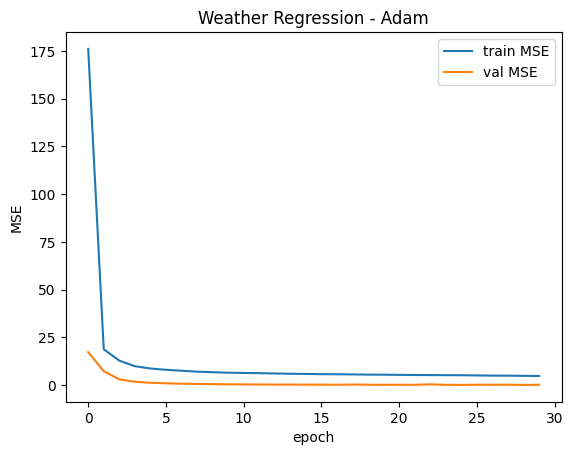

Adam val: {'MSE': 0.11406853795051575, 'RMSE': 0.33774033188819885, 'MAE': 0.22791337966918945, 'R2': 0.9983817934989929}
Adam test: {'MSE': 0.2038017064332962, 'RMSE': 0.45144402980804443, 'MAE': 0.2322637289762497, 'R2': 0.9969000816345215}


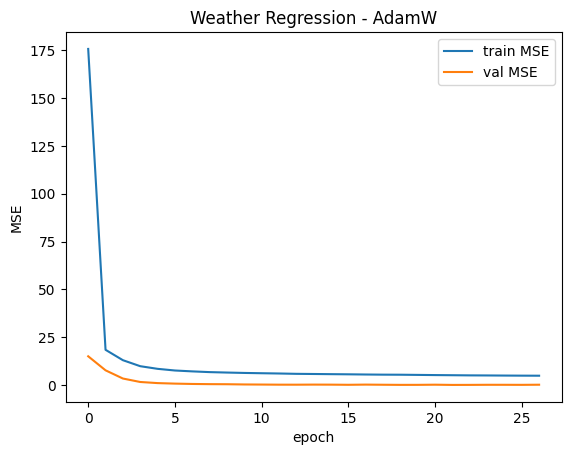

AdamW val: {'MSE': 0.1659412980079651, 'RMSE': 0.40735894441604614, 'MAE': 0.25780239701271057, 'R2': 0.997645914554596}
AdamW test: {'MSE': 0.24556690454483032, 'RMSE': 0.4955470860004425, 'MAE': 0.2626756727695465, 'R2': 0.9962648153305054}


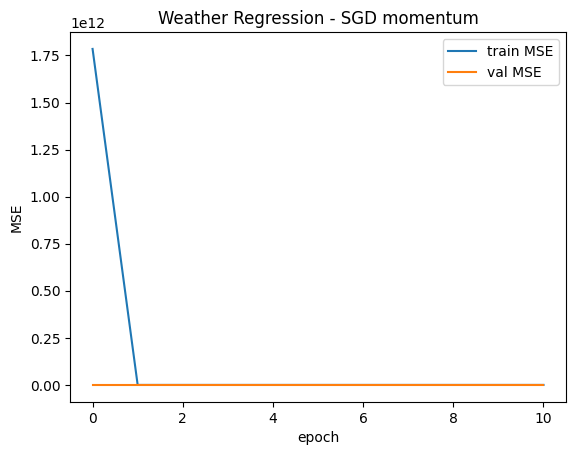

SGD val: {'MSE': 70.4905776977539, 'RMSE': 8.395866394042969, 'MAE': 5.8762736320495605, 'R2': -8.344650268554688e-07}
SGD test: {'MSE': 65.76061248779297, 'RMSE': 8.109292030334473, 'MAE': 5.742029190063477, 'R2': -0.00024449825286865234}


In [17]:
# 1) Adam
val_adam, test_adam = train_regression(torch.optim.Adam, lr=1e-3, weight_decay=1e-4, name="Adam")
print("Adam val:", val_adam)
print("Adam test:", test_adam)

# 2) AdamW
val_adamw, test_adamw = train_regression(torch.optim.AdamW, lr=1e-3, weight_decay=1e-2, name="AdamW")
print("AdamW val:", val_adamw)
print("AdamW test:", test_adamw)

# 3) SGD + momentum
def sgd_momentum(params, lr, weight_decay):
    return torch.optim.SGD(params, lr=lr, momentum=0.9, weight_decay=weight_decay)

val_sgd, test_sgd = train_regression(sgd_momentum, lr=5e-2, weight_decay=1e-4, name="SGD momentum")
print("SGD val:", val_sgd)
print("SGD test:", test_sgd)


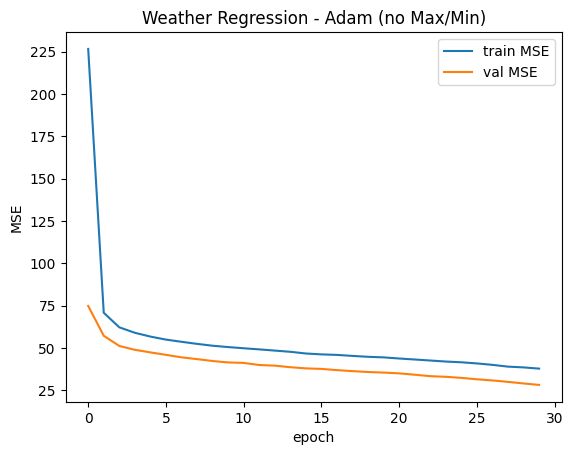

No-leak test: {'MSE': 25.904970169067383, 'RMSE': 5.08969259262085, 'MAE': 3.4615466594696045, 'R2': 0.605975329875946}


In [18]:
feature_cols_no_leak = ["STA","year","month","day","dayofyear","Precip","Snowfall"]
feature_cols_no_leak = [c for c in feature_cols_no_leak if c in df.columns]

X2 = df[feature_cols_no_leak].copy()
y2 = df[target].copy()

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.30, random_state=42)
X2_val, X2_test, y2_val, y2_test   = train_test_split(X2_temp, y2_temp, test_size=0.50, random_state=42)

imputer2 = SimpleImputer(strategy="median")
scaler2 = StandardScaler()

X_train_np = scaler2.fit_transform(imputer2.fit_transform(X2_train))
X_val_np   = scaler2.transform(imputer2.transform(X2_val))
X_test_np  = scaler2.transform(imputer2.transform(X2_test))

y_train_np = y2_train.to_numpy(dtype=np.float32).reshape(-1,1)
y_val_np   = y2_val.to_numpy(dtype=np.float32).reshape(-1,1)
y_test_np  = y2_test.to_numpy(dtype=np.float32).reshape(-1,1)

# rebuild loaders
train_ds = TensorDataset(torch.tensor(X_train_np, dtype=torch.float32),
                         torch.tensor(y_train_np, dtype=torch.float32))
val_ds   = TensorDataset(torch.tensor(X_val_np, dtype=torch.float32),
                         torch.tensor(y_val_np, dtype=torch.float32))
test_ds  = TensorDataset(torch.tensor(X_test_np, dtype=torch.float32),
                         torch.tensor(y_test_np, dtype=torch.float32))

train_loader = DataLoader(train_ds, batch_size=512, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=1024, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=1024, shuffle=False)

val_adam2, test_adam2 = train_regression(torch.optim.Adam, lr=1e-3, weight_decay=1e-4, name="Adam (no Max/Min)")
print("No-leak test:", test_adam2)
